<h1>Lighten Up!</h1>

In [1]:
%pylab inline


Populating the interactive namespace from numpy and matplotlib


<h3>Objective 1:</h3>
Connect to the Xtralien

In [2]:
#Use your connect script from 011
from connect import *
s = connect_any()

Connected
Well done for usuing Linux.


<h3>Objective 2:</h3>
Measure a voltage-current sweep of and LED


In [3]:
#Use the Xtralien sweep command
s.write(b"smu1 sweep 1.5 0.01 2.3")

23

In [4]:
#read the response
datastr = s.readline()

In [5]:
datastr

'[1.5023,-4.3191e-06;1.5123,-4.1976e-06;1.5224,-4.169e-06;1.5321,-3.8687e-06;1.5421,-3.7557e-06;1.5521,-3.5155e-06;1.5621,-3.0564e-06;1.5721,-2.8996e-06;1.5822,-2.6908e-06;1.5922,-2.0255e-06;1.6022,-1.6381e-06;1.6122,-7.5795e-07;1.6223,1.1646e-07;1.6322,1.0378e-06;1.6422,2.3358e-06;1.6523,3.9164e-06;1.6623,5.7349e-06;1.6724,8.3555e-06;1.6819,1.1353e-05;1.692,1.4913e-05;1.702,1.9403e-05;1.712,2.4953e-05;1.722,3.1988e-05;1.732,4.0741e-05;1.742,5.1819e-05;1.752,6.51e-05;1.762,8.1969e-05;1.7719,0.00010324;1.782,0.00012958;1.792,0.00016301;1.802,0.00020468;1.8119,0.00025718;1.8218,0.00032365;1.8319,0.00040719;1.8414,0.00050643;1.8512,0.00063331;1.8611,0.00078993;1.871,0.00098258;1.8807,0.0012124;1.8904,0.0014867;1.9002,0.0018141;1.9098,0.0021952;1.9194,0.0026324;1.9289,0.0031317;1.9383,0.003697;1.9477,0.0043317;1.9569,0.005035;1.9661,0.0058038;1.9753,0.0066477;1.984,0.0075304;1.9931,0.0085262;2.002,0.0095753;2.0108,0.010703;2.0195,0.011908;2.0283,0.01319;2.037,0.014537;2.0454,0.015955;2.054

<h3>Objective 3:</h3>
Plot the data. 

In [6]:
#need to convert raw string data into something useful!
import re #will need this

def raw_convert(string):
    #first remove all characters that are not ,;- or int
    string = re.sub('[\[\]\n]', '', string)
    
    #next split string at to create a list;
    data = string.split(';')
    
    #now split again at ,
    data = [x.split(',') for x in data]
    
    #finally need to convert each string in list to float
    data = [[float(y) for y in x] for x in data]

    return data

In [7]:
data = raw_convert(datastr)

In [8]:
#data

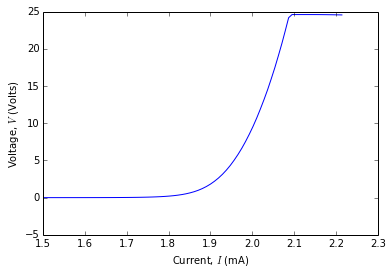

In [9]:
#from here you can either write the data to file or plot it
#remember to transpose before plotting
data_trans = transpose(data)
x = data_trans[0]
y = data_trans[1]*1000 #convert to mA
plot(x, y)
xlabel('Current, $I$ (mA)')
ylabel('Voltage, $V$ (Volts)')

In [10]:
#If your plot doesn't look like that abve then you've probably got your LED connectede the wrong way around.


<h3>Objective 4</h3>
Estimate $V_d$

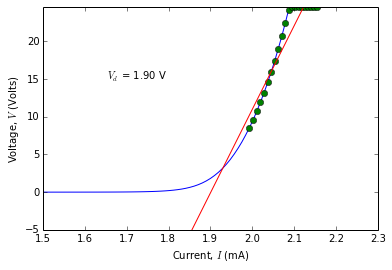

In [11]:
from ipywidgets import *

def regression(mini, maxi):
    m, c =polyfit(x[mini:maxi], y[mini:maxi], 1)
    return m, c

def plot_iv(mini, maxi):
    fig = figure()
    ax = fig.add_subplot(111)
    ax.plot(x, y)
    ax.set_xlabel('Current, $I$ (mA)')
    ax.set_ylabel('Voltage, $V$ (Volts)')
    ax.plot(x[mini:maxi], y[mini:maxi], 'o')
    m, c = regression(mini, maxi)
    xi = linspace(min(x), max(x), 1000)
    yi = m*xi+c
    ax.plot(xi, yi, '-', color='red')
    #print('$V_d$ = {0} V'.format('test'))
    ax.set_ylim([-5, max(y)])
    idx = abs(yi-0).argmin()
    ax.text(min(x)*1.1, 15, '$V_d$ = {0:.2f} V'.format(xi[idx]))
    
mini_s = IntSlider(min=0, max=len(x)-1, step=1, value=0)
maxi_s = IntSlider(min=0, max=len(x)-1, step = 1,value=len(x)-1)

interactive(plot_iv, mini=mini_s, maxi=maxi_s)

#This sort of thing is really useful for (alpha.hv)**2 plots and extracting band gaps from transmission data
    

In [12]:
data

[[1.5023, -4.3191e-06],
 [1.5123, -4.1976e-06],
 [1.5224, -4.169e-06],
 [1.5321, -3.8687e-06],
 [1.5421, -3.7557e-06],
 [1.5521, -3.5155e-06],
 [1.5621, -3.0564e-06],
 [1.5721, -2.8996e-06],
 [1.5822, -2.6908e-06],
 [1.5922, -2.0255e-06],
 [1.6022, -1.6381e-06],
 [1.6122, -7.5795e-07],
 [1.6223, 1.1646e-07],
 [1.6322, 1.0378e-06],
 [1.6422, 2.3358e-06],
 [1.6523, 3.9164e-06],
 [1.6623, 5.7349e-06],
 [1.6724, 8.3555e-06],
 [1.6819, 1.1353e-05],
 [1.692, 1.4913e-05],
 [1.702, 1.9403e-05],
 [1.712, 2.4953e-05],
 [1.722, 3.1988e-05],
 [1.732, 4.0741e-05],
 [1.742, 5.1819e-05],
 [1.752, 6.51e-05],
 [1.762, 8.1969e-05],
 [1.7719, 0.00010324],
 [1.782, 0.00012958],
 [1.792, 0.00016301],
 [1.802, 0.00020468],
 [1.8119, 0.00025718],
 [1.8218, 0.00032365],
 [1.8319, 0.00040719],
 [1.8414, 0.00050643],
 [1.8512, 0.00063331],
 [1.8611, 0.00078993],
 [1.871, 0.00098258],
 [1.8807, 0.0012124],
 [1.8904, 0.0014867],
 [1.9002, 0.0018141],
 [1.9098, 0.0021952],
 [1.9194, 0.0026324],
 [1.9289, 0.0031317